<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bassignment%5D_SVM_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/curinc/classification/

/content/drive/MyDrive/curinc/classification


# [과제] 최적의 SVM 모델 찾기

---

## 본 과제의 목표는 다음과 같음

1. `rbf` 커널 함수를 사용한 SVM 모델을 정의할 수 있음
2. 학습과 평가 데이터셋을 나눌 수 있으며, 평가 데이터셋에 대한 분류 성능을 평가할 수 있음
3. `sklearn`에서 제공하는 하이퍼파라미터 서치 툴을 사용할 수 있음
4. SVM 모델 구현에 사용되는 하이퍼파라미터의 역할을 이해하고 분석할 수 있음

## [P.1] SVM 모델을 다양한 하이퍼파라미터로 학습하기

`rbf` 커널 함수를 사용한 SVM 모델을 정의할 때, 다양한 하이퍼파라미터 값을 설정해서 학습하며 성능 비교하기    
참고로, 이전 practice 파일에서처럼 학습 데이터셋이 아닌, 사이킷런 함수를 통해 만든 평가 데이터셋에 대해서 성능 평가하기

In [ ]:
# Make train and test dataset
from sklearn.model_selection import train_test_split  # divide train and test
from sklearn.datasets import make_moons # moons dataset

X, y = make_moons(n_samples=1000, noise=0.4) # add noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

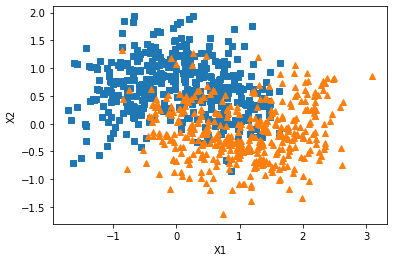

In [ ]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.xlabel("X1")
    plt.ylabel("X2")
    
    
plot_dataset(X_train, y_train)

In [ ]:
# define model with pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
# 평가 데이터셋에 대한 성능 확인을 위해서 sklearn.metrics 안의 함수를 사용해주세요
from sklearn.metrics import accuracy_score

In [ ]:
params = [(5, 5), (3, 1)]  # any combination you want!

svm_clfs = []
for g, C in params:
    svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='rbf', gamma=g, C=C))]) 
    svm_clf.fit(X, y) 
    svm_clfs.append(svm_clf)

In [ ]:
print(params)
for g, C in params:
  print(g,C)
for i, param in enumerate(params):
  print(i,param)

[(5, 5), (3, 1)]
5 5
3 1
0 (5, 5)
1 (3, 1)


In [ ]:
def plot_predictions(clf):
    x0 = np.linspace(-3, 3, 100)
    x1 = np.linspace(-3, 3, 100)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1)

[(5, 5)] Acc: 0.8675
[(3, 1)] Acc: 0.8625


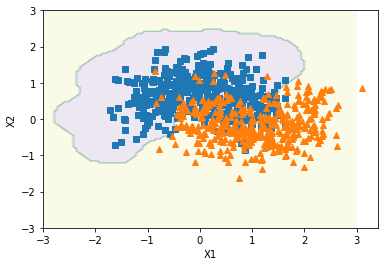

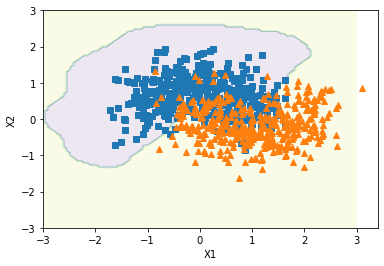

In [ ]:
for i, svm_clf in enumerate(svm_clfs):
    plt.figure(figsize=(6, 4))
    
    plot_dataset(X_train, y_train)
    
    plot_predictions(svm_clf)
    
    y_pred = svm_clf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    
    print('[%s] Acc: %s' % (params[i], acc))

## [P.2] GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기

직접 하나부터 열까지 구현하는 것을 방지하기 위해 사이킷런에서는 유용한 툴을 제공해주고 있음    
`sklearn`의 [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 클래스를 이용해서 교차 검증을 구현해보기     
`make_moons` 데이터셋에 가장 적합한 하이퍼파라미터를 찾고, 평가 데이터에 대한 최고 성능 얻기

In [ ]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

svm_clf = SVC()
param_grid = {
    'kernel': [ 'linear', 'poly', 'rbf' ],
    'gamma': [ 0.1, 1 ],
    'C': [ 0.1, 10 ]
}

grid_search_cv = GridSearchCV(svm_clf, param_grid)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
# get results of cross-validation
grid_search_cv.cv_results_

{'mean_fit_time': array([0.0212399 , 0.05351925, 0.03210421, 0.01446576, 0.01643047,
        0.02239027, 0.02833109, 0.01496987, 0.01787186, 0.03160748,
        0.03296995, 0.01427693]),
 'std_fit_time': array([0.008812  , 0.01296204, 0.01018208, 0.00394367, 0.00321634,
        0.00395834, 0.00891374, 0.0007572 , 0.00101379, 0.01061265,
        0.00266212, 0.00385695]),
 'mean_score_time': array([0.00745072, 0.00820684, 0.00809855, 0.00496588, 0.00298433,
        0.00776129, 0.00352907, 0.00364628, 0.00512414, 0.00394883,
        0.002738  , 0.00300722]),
 'std_score_time': array([5.09861678e-03, 3.29433675e-03, 1.56078167e-03, 3.09392370e-03,
        1.12644278e-04, 3.38942579e-03, 2.13389154e-03, 4.28846822e-04,
        1.40773232e-04, 2.86053108e-03, 9.02468964e-05, 6.03546306e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [ ]:
grid_search_cv.best_estimator_

SVC(C=10, gamma=1)

0.83


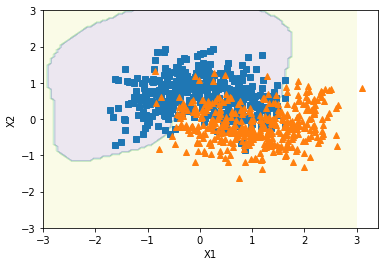

In [ ]:
plt.figure(figsize=(6, 4))
    
plot_dataset(X_train, y_train)

plot_predictions(grid_search_cv)

y_pred = grid_search_cv.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)


## [P.3] 하이퍼파라미터 서치 결과 분석

P.2에서 구현했던 내용을 바탕으로, 아래 질문에 대한 답변 작성

#### Q.1) 어떤 하이퍼파라미터와 값들을 후보군으로 설정했는지 서술
---

#### Q.2) 해당 하이퍼파라미터의 역할을 분석하고, 왜 해당 결과값이 가장 좋은 성능을 보여줄 수 있었는지에 대해 자유롭게 작성
---